# 🐾 Step 10-12: Model Evaluation

In this notebook, we will:
1. Load the trained model
2. Evaluate on the test set
3. Create a confusion matrix
4. Test with individual images
5. Understand what the model learned

## 10.1 Setup

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import os

# Settings
IMG_SIZE = (224, 224)
BATCH_SIZE = 16

# Paths
DATA_DIR = "../../data"
TEST_DIR = os.path.join(DATA_DIR, "test")
MODEL_PATH = "../../models/best_model.keras"

# Class names (in alphabetical order - same as training)
CLASS_NAMES = ['domestic_cat', 'domestic_dog', 'european_badger']

## 10.2 Load the Trained Model

In [13]:
# Load the best model from training
model = tf.keras.models.load_model(MODEL_PATH)
print("Model loaded successfully!")
print(f"Model input shape: {model.input_shape}")
print(f"Model output shape: {model.output_shape}")

Model loaded successfully!
Model input shape: (None, 224, 224, 3)
Model output shape: (None, 3)


## 10.3 Prepare Test Data

In [14]:
# Test data generator - no augmentation, just rescale
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Important! Keep order for evaluation
)

print(f"\nTest samples: {test_generator.samples}")
print(f"Class indices: {test_generator.class_indices}")

Found 61 images belonging to 3 classes.

Test samples: 61
Class indices: {'domestic_cat': 0, 'domestic_dog': 1, 'european_badger': 2}


## 10.4 Evaluate on Test Set

In [15]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)

print("\n" + "="*50)
print(f"TEST RESULTS")
print("="*50)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.2%}")
print("="*50)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 260ms/step - accuracy: 0.4918 - loss: 1.0777

TEST RESULTS
Test Loss: 1.0777
Test Accuracy: 49.18%


## 11.1 Get Predictions for Confusion Matrix

In [16]:
# Get predictions
test_generator.reset()  # Reset to start from beginning
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_generator.classes

print(f"Predictions shape: {predictions.shape}")
print(f"Number of test samples: {len(true_classes)}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step
Predictions shape: (61, 3)
Number of test samples: 61


## 11.2 Create Confusion Matrix

A confusion matrix shows:
- **Diagonal**: Correct predictions ✅
- **Off-diagonal**: Mistakes ❌

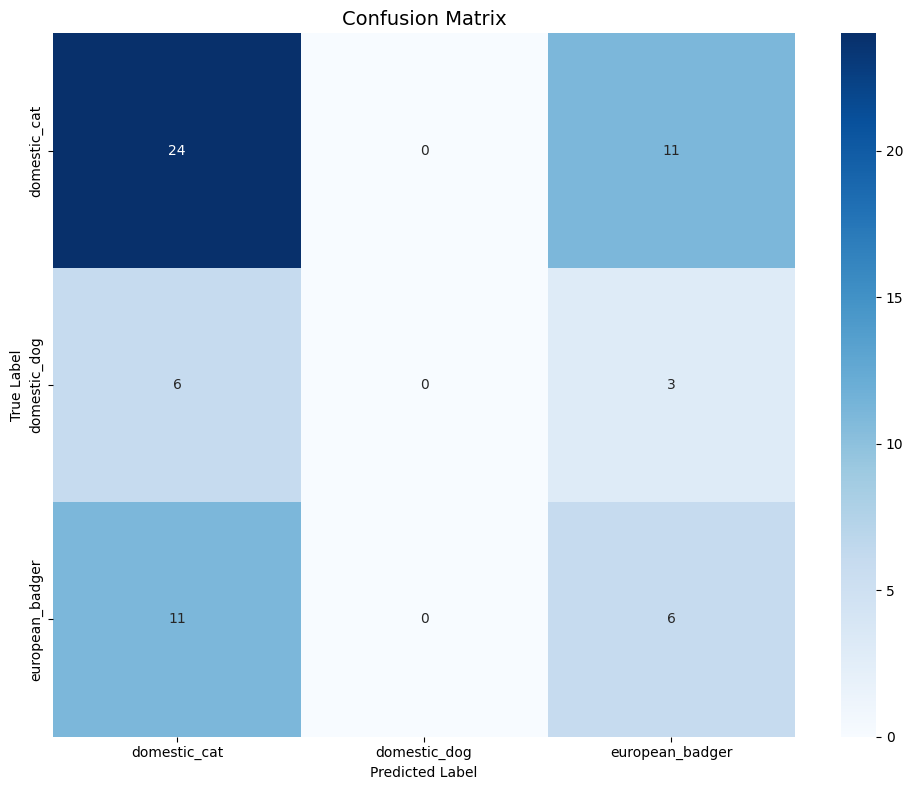


How to read: Row = True label, Column = Predicted label
Diagonal values = Correct predictions


In [17]:
# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues',
    xticklabels=CLASS_NAMES,
    yticklabels=CLASS_NAMES
)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig('../models/confusion_matrix.png', dpi=150)
plt.show()

print("\nHow to read: Row = True label, Column = Predicted label")
print("Diagonal values = Correct predictions")

## 11.3 Classification Report

Detailed metrics for each class:

In [18]:
# Print classification report
print("\nCLASSIFICATION REPORT")
print("="*60)
print(classification_report(true_classes, predicted_classes, target_names=CLASS_NAMES))

print("\nMetrics explained:")
print("- Precision: Of all predicted X, how many were actually X?")
print("- Recall: Of all actual X, how many did we find?")
print("- F1-score: Balance between precision and recall")


CLASSIFICATION REPORT
                 precision    recall  f1-score   support

   domestic_cat       0.59      0.69      0.63        35
   domestic_dog       0.00      0.00      0.00         9
european_badger       0.30      0.35      0.32        17

       accuracy                           0.49        61
      macro avg       0.30      0.35      0.32        61
   weighted avg       0.42      0.49      0.45        61


Metrics explained:
- Precision: Of all predicted X, how many were actually X?
- Recall: Of all actual X, how many did we find?
- F1-score: Balance between precision and recall


c:\Users\ayoub\Desktop\DL_PROJECT\PROJECT\DLV\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ayoub\Desktop\DL_PROJECT\PROJECT\DLV\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ayoub\Desktop\DL_PROJECT\PROJECT\DLV\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

## 12.1 Test with Individual Images

Let's see the model's predictions on specific images!

In [19]:
def predict_image(image_path):
    """
    Predict the class of a single image.
    
    Args:
        image_path: Path to the image file
    
    Returns:
        predicted_class, confidence, all_probabilities
    """
    # Load and preprocess
    img = load_img(image_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict
    predictions = model.predict(img_array, verbose=0)
    predicted_class = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class]
    
    return CLASS_NAMES[predicted_class], confidence, predictions[0]

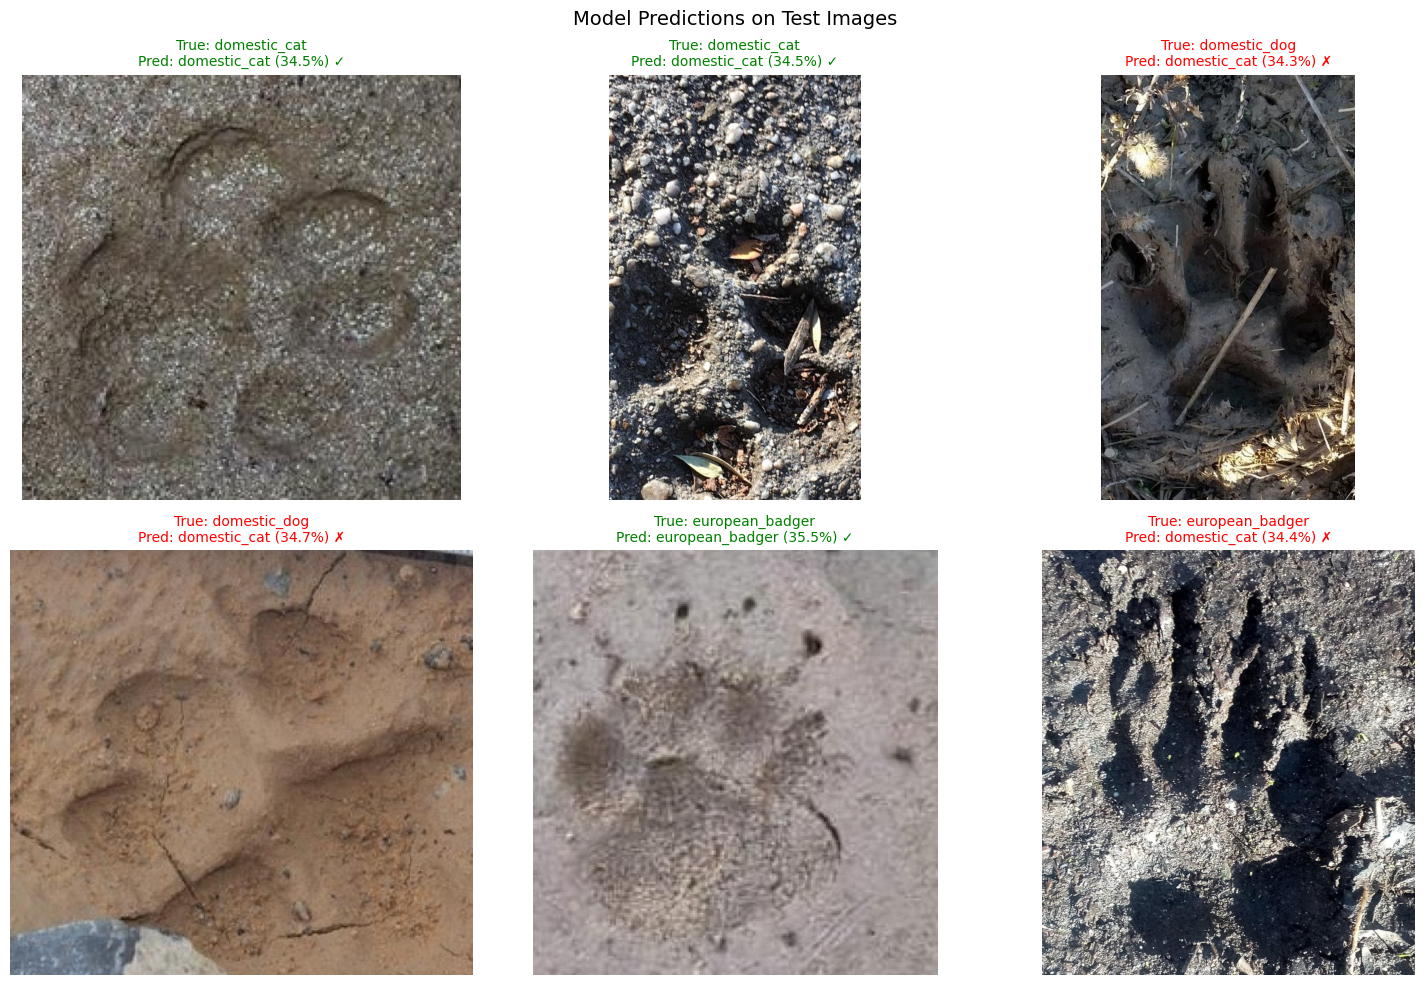

In [20]:
# Test on sample images from test set
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Get sample images from each class
sample_images = []
for class_name in CLASS_NAMES:
    class_path = os.path.join(TEST_DIR, class_name)
    images = os.listdir(class_path)[:2]  # Get first 2 images
    for img_name in images:
        sample_images.append((os.path.join(class_path, img_name), class_name))

# Predict and display
for i, (img_path, true_label) in enumerate(sample_images[:6]):
    pred_class, confidence, probs = predict_image(img_path)
    
    # Load and display image
    img = plt.imread(img_path)
    axes[i].imshow(img)
    
    # Color title based on correctness
    correct = pred_class == true_label
    color = 'green' if correct else 'red'
    symbol = '✓' if correct else '✗'
    
    axes[i].set_title(
        f"True: {true_label}\nPred: {pred_class} ({confidence:.1%}) {symbol}",
        color=color,
        fontsize=10
    )
    axes[i].axis('off')

plt.suptitle('Model Predictions on Test Images', fontsize=14)
plt.tight_layout()
plt.savefig('../models/sample_predictions.png', dpi=150)
plt.show()

## 12.2 Prediction Confidence Analysis

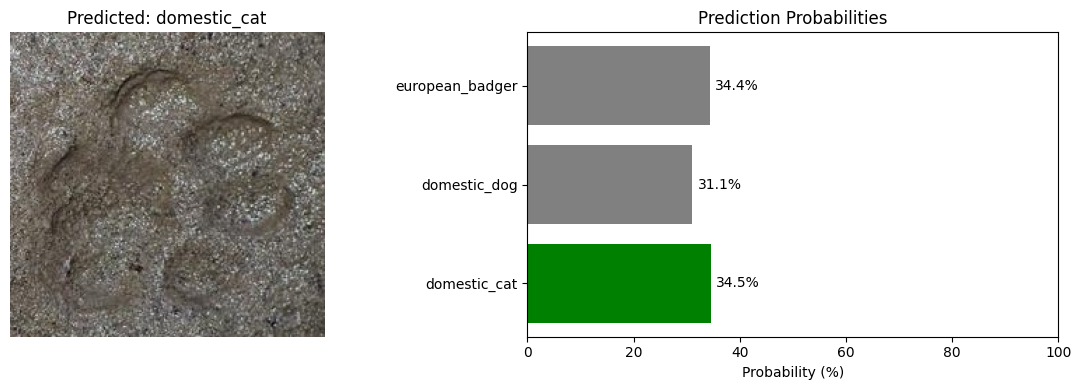

In [21]:
# Show prediction probabilities for one example
sample_path = os.path.join(TEST_DIR, CLASS_NAMES[0], os.listdir(os.path.join(TEST_DIR, CLASS_NAMES[0]))[0])
pred_class, confidence, probs = predict_image(sample_path)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Show image
img = plt.imread(sample_path)
ax1.imshow(img)
ax1.set_title(f"Predicted: {pred_class}")
ax1.axis('off')

# Show probabilities
colors = ['green' if CLASS_NAMES[i] == pred_class else 'gray' for i in range(3)]
bars = ax2.barh(CLASS_NAMES, probs * 100, color=colors)
ax2.set_xlabel('Probability (%)')
ax2.set_title('Prediction Probabilities')
ax2.set_xlim(0, 100)

# Add percentage labels
for bar, prob in zip(bars, probs):
    ax2.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
             f'{prob*100:.1f}%', va='center')

plt.tight_layout()
plt.show()

## 12.3 Summary for Your Presentation

In [22]:
# Final summary
print("\n" + "="*60)
print("FINAL MODEL SUMMARY")
print("="*60)
print(f"\n📊 Test Accuracy: {test_accuracy:.2%}")
print(f"\n🎯 Classes: {CLASS_NAMES}")
print(f"\n🖼️ Test images: {test_generator.samples}")
print("\n📈 Files saved:")
print("   - ../models/best_model.keras")
print("   - ../models/confusion_matrix.png")
print("   - ../models/sample_predictions.png")
print("   - ../models/training_history.png")
print("="*60)


FINAL MODEL SUMMARY

📊 Test Accuracy: 49.18%

🎯 Classes: ['domestic_cat', 'domestic_dog', 'european_badger']

🖼️ Test images: 61

📈 Files saved:
   - ../models/best_model.keras
   - ../models/confusion_matrix.png
   - ../models/sample_predictions.png
   - ../models/training_history.png


## ✅ All Steps Complete! 🎉

**What you can tell the jury:**

1. **Problem**: "We built a CNN to classify animal footprints"
2. **Data**: "We had X images across 3 classes: cat, dog, badger"
3. **Method**: "We used a simple CNN with 3 Conv blocks + Dense layers"
4. **Training**: "We used data augmentation and early stopping"
5. **Results**: "We achieved X% accuracy on the test set"
6. **Confusion Matrix**: "The model performs best on X, sometimes confuses Y and Z"

**Congratulations! Your footprint classifier is complete!** 🐾